## Visuailzing multiple enrichment analysis results

Utilizing GSEApy, we present an example of visualizing the outcomes of multiple enrichment analyses. Here, we employ a dataset from a study that examined transcriptomic alterations induced by BK polyomavirus infection in renal tubular epithelial cells ([Assetta et al. 2019](https://doi.org/10.1128/mbio.02354-19)).

In [1]:
import gseapy

In [2]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
count_df = pd.read_csv("PRJNA560236_count.txt", sep="\t").T
count_df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
SRR9967595,20,81,1,0,22,0,0,0,669,0,...,1055,1034,295,363,1053,96,2297,2381,1801,2806
SRR9967596,27,80,1,1,14,0,0,0,504,0,...,901,1023,299,293,868,80,1998,2238,1521,2481
SRR9967597,15,82,0,3,18,0,0,0,513,0,...,1307,1564,257,409,1040,84,2527,1895,1939,2901
SRR9967598,9,44,1,1,7,1,0,0,488,0,...,978,1779,66,123,612,108,1072,858,1228,1927
SRR9967599,23,77,0,2,10,0,0,3,721,1,...,1650,2778,135,183,855,121,1769,1016,1484,2843


In [4]:
clinical_df = pd.read_csv("SraRunTable_PRJNA560236.txt", sep=",")
clinical_df.index = clinical_df.Run
clinical_df.index.name = None
candidate = clinical_df[clinical_df["time_point"]=="at 6 days post infection"].index
candidate = list(set(candidate) & set(count_df.index))
clinical_df.head()

,Run,Assay Type,AvgSpotLen,BioProject,BioSample,cell_source,Cell_type,Center Name,Consent,DATASTORE filetype,...,MBytes,Organism,Platform,ReleaseDate,sample_acc,Sample Name,source_name,SRA Study,time_point,treatment
SRR9967595,SRR9967595,RNA-Seq,100,PRJNA560236,SAMN12572476,13 months old female,Primary Human Renal Epithelial Cells (ATCC),GEO,public,"fastq,sra",...,2404,Homo sapiens,ILLUMINA,2019-08-15T00:00:00Z,SRS5268041,GSM4034946,BK infected cells at 3 days post infection,SRP218354,at 3 days post infection,BK polyomavirus (BKPyV)
SRR9967596,SRR9967596,RNA-Seq,100,PRJNA560236,SAMN12572509,13 months old female,Primary Human Renal Epithelial Cells (ATCC),GEO,public,"fastq,sra",...,1997,Homo sapiens,ILLUMINA,2019-08-15T00:00:00Z,SRS5268042,GSM4034947,BK infected cells at 3 days post infection,SRP218354,at 3 days post infection,BK polyomavirus (BKPyV)
SRR9967597,SRR9967597,RNA-Seq,100,PRJNA560236,SAMN12572508,13 months old female,Primary Human Renal Epithelial Cells (ATCC),GEO,public,"fastq,sra",...,2375,Homo sapiens,ILLUMINA,2019-08-15T00:00:00Z,SRS5268043,GSM4034948,BK infected cells at 3 days post infection,SRP218354,at 3 days post infection,BK polyomavirus (BKPyV)
SRR9967598,SRR9967598,RNA-Seq,100,PRJNA560236,SAMN12572507,13 months old female,Primary Human Renal Epithelial Cells (ATCC),GEO,public,"fastq,sra",...,1921,Homo sapiens,ILLUMINA,2019-08-15T00:00:00Z,SRS5268044,GSM4034949,BK infected cells at 6 days post infection,SRP218354,at 6 days post infection,BK polyomavirus (BKPyV)
SRR9967599,SRR9967599,RNA-Seq,100,PRJNA560236,SAMN12572506,13 months old female,Primary Human Renal Epithelial Cells (ATCC),GEO,public,"fastq,sra",...,2676,Homo sapiens,ILLUMINA,2019-08-15T00:00:00Z,SRS5268045,GSM4034950,BK infected cells at 6 days post infection,SRP218354,at 6 days post infection,BK polyomavirus (BKPyV)


In [5]:
dds = DeseqDataSet(
    counts=count_df.loc[candidate,:],
    clinical=clinical_df.loc[candidate,:],
    design_factors="treatment", 
    refit_cooks=True,
    n_cpus=8,
)

In [6]:
dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 10.25 seconds.

Fitting dispersion trend curve...
... done in 11.86 seconds.

Fitting MAP dispersions...
... done in 10.26 seconds.

Fitting LFCs...
... done in 3.59 seconds.



In [7]:
dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

Refitting 0 outliers.



In [8]:
stat_res = DeseqStats(dds, alpha=0.05,contrast=["treatment","BK polyomavirus (BKPyV)","none (uninfected)"])
stat_res.run_wald_test()
if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values
if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()
stat_res.summary()

Running Wald tests...
... done in 4.53 seconds.

Log2 fold change & Wald test p-value: treatment BK polyomavirus (BKPyV) vs none (uninfected)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG,15.356750,0.019922,0.380606,0.052344,9.582549e-01,0.974228
A1BG-AS1,79.427946,-0.747451,0.292659,-2.554004,1.064922e-02,0.032686
A1CF,0.685369,-1.268784,1.636031,-0.775526,4.380292e-01,NaN
A2M,0.968656,0.189368,1.209550,0.156561,8.755908e-01,NaN
A2M-AS1,12.146683,-1.006216,0.439510,-2.289404,2.205589e-02,0.059017
...,...,...,...,...,...,...
ZYG11A,84.048757,1.337741,0.262999,5.086480,3.647705e-07,0.000004
ZYG11B,1863.055526,-0.436978,0.184829,-2.364225,1.806783e-02,0.050254
ZYX,1102.044658,-0.545409,0.301693,-1.807829,7.063307e-02,0.147662
ZZEF1,1504.948093,-0.016638,0.169712,-0.098035,9.219047e-01,0.951360


In [9]:
stat_res_summary = stat_res.results_df

In [10]:
sig_genes_up = list(stat_res_summary[(stat_res_summary.padj<0.05) & (stat_res_summary.log2FoldChange>0)].index)
sig_genes_down = list(stat_res_summary[(stat_res_summary.padj<0.05) & (stat_res_summary.log2FoldChange<0)].index)

In [11]:
enr_res_up = gseapy.enrichr(gene_list=sig_genes_up,
                     organism='Human',
                     gene_sets='KEGG_2021_Human',
                     cutoff = 0.05)
enr_res_down = gseapy.enrichr(gene_list=sig_genes_down,
                     organism='Human',
                     gene_sets='KEGG_2021_Human',
                     cutoff = 0.05)

<Axes: xlabel='$- \\log_{10}$ (Adjusted P-value)'>

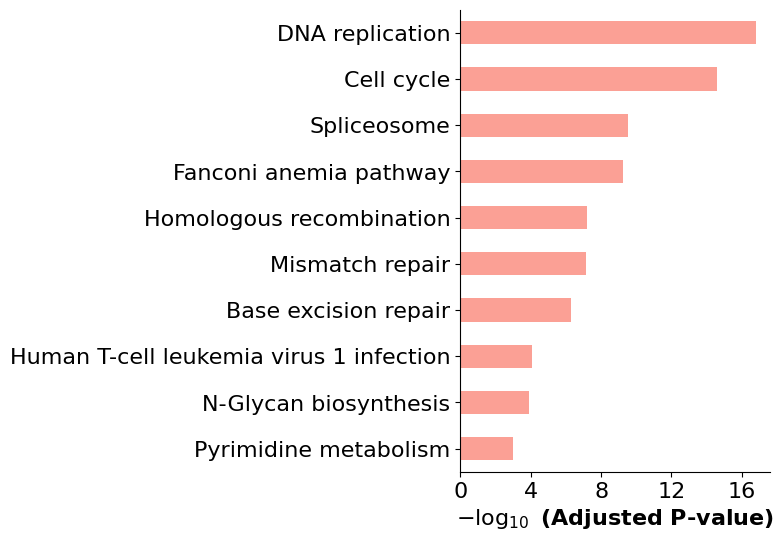

In [12]:
gseapy.barplot(enr_res_up.res2d)

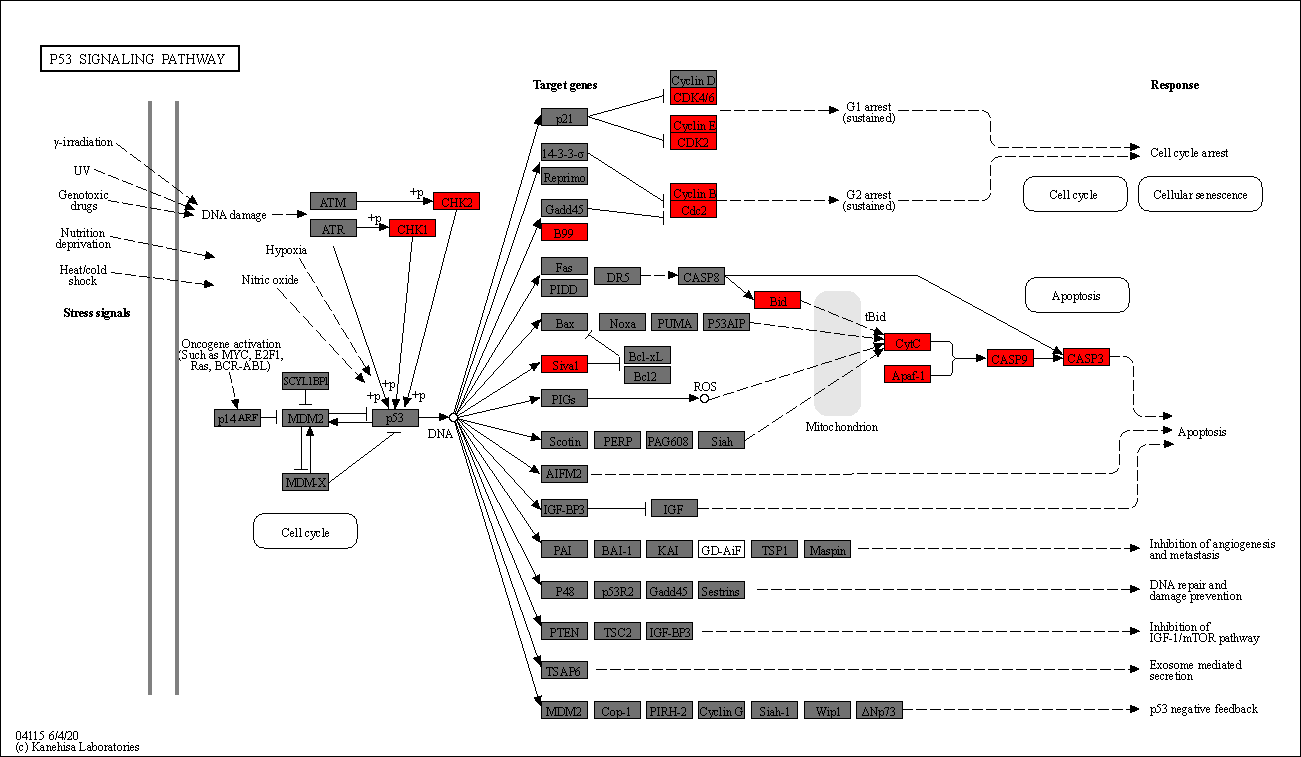

In [13]:
import requests_cache
import pykegg
from PIL import Image
## Cache all the downloaded files
requests_cache.install_cache('pykegg_cache')

## Single results
Image.fromarray(pykegg.visualize_gseapy(enr_res_up,
                                 colors=["#ff0000"],
                                 pathway_name="p53 signaling pathway"))

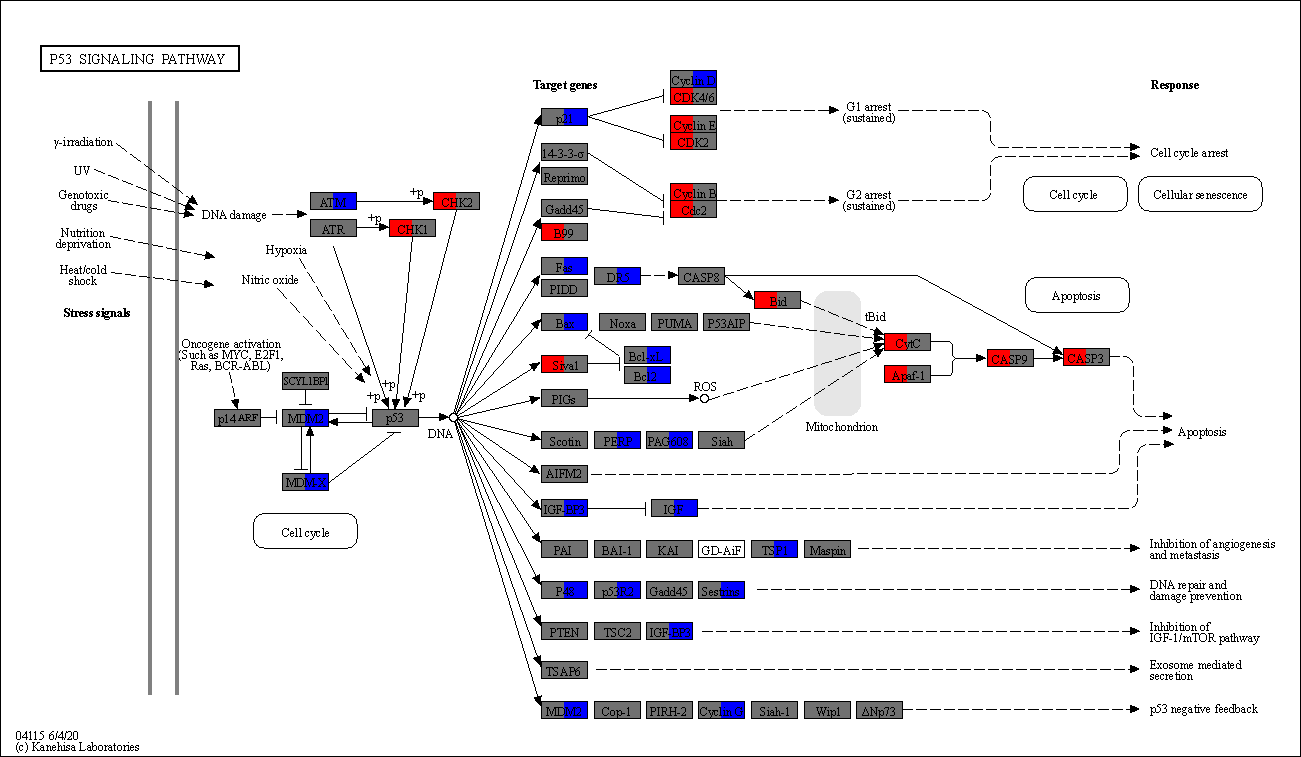

In [15]:
## Multiple results
Image.fromarray(pykegg.visualize_gseapy([enr_res_up, enr_res_down],
                                 colors=["#ff0000", "#0000ff"],
                                 pathway_name="p53 signaling pathway"))